<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4a: Predict West Nile Virus

## Part 4 - Combination of Datasets - EDA

## Contents:
- [Import Data](#Import-Data)
- [Merging Datasets](#Merging-Datasets)
- [Correlation Matrix](#Plot-Correlation-Matrix)
- [Correlation Heatmap](#Plot-Correlation-Heatmap)
- [Save Dataset](#Save-Dataset)

## Import Data

### Import all necessary libraries

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt
import re
import string

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#hide warnings
import warnings
warnings.filterwarnings('ignore')

### Import Data from both clean datasets

In [2]:
%store -r train_df
%store -r test_df
%store -r spray_df
%store -r weather

In [3]:
# Print 2 rows of train_df dataset
train_df.head(2)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,date_1,month,year,geometry,week,yearmonth,yearweek
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-05-29,5,2007,POINT (-87.800991 41.95469),22,20075,200722
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-05-29,5,2007,POINT (-87.800991 41.95469),22,20075,200722


In [4]:
# Print 2 rows of weather dataset
weather.head(2)

,station,date,t_avg,dew_point,wet_bulb,precip_total,stn_pressure,sea_level,result_speed,result_dir,avg_speed,wet_dry,week,month,year,year_month,year_week
0,1,2007-05-01,67.0,51,56.0,0.0,29.10,29.82,1.7,27,9.2,0,18,5,2007,20075,200718
1,2,2007-05-01,68.0,51,57.0,0.0,29.18,29.82,2.7,25,9.6,0,18,5,2007,20075,200718


In [5]:
train_df['station'] = train_df['latitude'].map(lambda x:1 if x >=41.85 else 2)

## Merging Datasets

In [6]:
train_merged_df = train_df.merge(weather, how='left', on=['date','station'])

In [7]:
train_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10506 non-null  datetime64[ns]
 1   address                 10506 non-null  object        
 2   species                 10506 non-null  object        
 3   block                   10506 non-null  int64         
 4   street                  10506 non-null  object        
 5   trap                    10506 non-null  object        
 6   addressnumberandstreet  10506 non-null  object        
 7   latitude                10506 non-null  float64       
 8   longitude               10506 non-null  float64       
 9   addressaccuracy         10506 non-null  int64         
 10  nummosquitos            10506 non-null  int64         
 11  wnvpresent              10506 non-null  int64         
 12  date_1                  10506 non-null  dateti

In [8]:
train_merged_df = pd.get_dummies(columns=['species'], drop_first=True, data = train_merged_df)

train_merged_df['species_UNSPECIFIED CULEX'] = 0

train_merged_df.head()

,date,address,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,...,year_y,year_month,year_week,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,species_UNSPECIFIED CULEX
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,2007,20075,200722,0,1,0,0,0,0,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,2007,20075,200722,0,0,1,0,0,0,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,...,2007,20075,200722,0,0,1,0,0,0,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,...,2007,20075,200722,0,1,0,0,0,0,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,...,2007,20075,200722,0,0,1,0,0,0,0


In [9]:
train_merged_df.to_csv('../assets/train_merged_df.csv')

In [10]:
pd.set_option('display.max_rows', 500)
train_merged_df.corr()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,month_x,year_x,week_x,yearmonth,...,year_y,year_month,year_week,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,species_UNSPECIFIED CULEX
block,1.000000,0.091110,-0.090375,0.222134,-0.172388,0.004877,0.010263,0.047036,-0.000296,0.011942,...,0.047036,0.011942,0.047215,-0.069766,0.038035,0.026761,-0.011422,-0.005095,0.007323,NaN
latitude,0.091110,1.000000,-0.701795,0.444026,-0.184806,0.028697,-0.085219,0.163832,-0.088314,-0.004925,...,0.163832,-0.004925,0.162730,-0.144663,0.062009,0.094609,-0.012897,-0.004902,-0.055835,NaN
longitude,-0.090375,-0.701795,1.000000,-0.456775,0.036633,-0.060345,0.097004,-0.188830,0.099188,0.012361,...,-0.188830,0.012361,-0.187612,0.118359,-0.050222,-0.082830,0.005761,0.009497,0.063229,NaN
addressaccuracy,0.222134,0.444026,-0.456775,1.000000,-0.248414,0.008064,-0.074983,0.162514,-0.088319,0.007425,...,0.162514,0.007425,0.161407,-0.159680,0.075106,0.081840,-0.003257,-0.005257,-0.022292,NaN
nummosquitos,-0.172388,-0.184806,0.036633,-0.248414,1.000000,0.196820,-0.026040,-0.029611,-0.017304,-0.060153,...,-0.029611,-0.060153,-0.030069,0.134754,0.061499,-0.158393,-0.062886,-0.017317,-0.096136,NaN
wnvpresent,0.004877,0.028697,-0.060345,0.008064,0.196820,1.000000,0.100143,0.050865,0.100466,-0.033264,...,0.050865,-0.033264,0.053048,0.096206,0.010960,-0.092094,-0.021373,-0.005624,-0.034566,NaN
month_x,0.010263,-0.085219,0.097004,-0.074983,-0.026040,0.100143,1.000000,-0.164287,0.961684,0.354942,...,-0.164287,0.354942,-0.145940,0.261550,0.005906,-0.273634,-0.017375,0.025542,0.026192,NaN
year_x,0.047036,0.163832,-0.188830,0.162514,-0.029611,0.050865,-0.164287,1.000000,-0.208008,-0.146044,...,1.000000,-0.146044,0.999813,-0.220509,0.043510,0.189030,-0.032104,0.007686,-0.039893,NaN
week_x,-0.000296,-0.088314,0.099188,-0.088319,-0.017304,0.100466,0.961684,-0.208008,1.000000,0.305353,...,-0.208008,0.305353,-0.189075,0.271052,0.009412,-0.290069,-0.018726,0.027980,0.036084,NaN
yearmonth,0.011942,-0.004925,0.012361,0.007425,-0.060153,-0.033264,0.354942,-0.146044,0.305353,1.000000,...,-0.146044,1.000000,-0.140587,0.053070,0.002621,-0.062169,-0.008347,-0.003920,0.025490,NaN


### Plot Correlation Matrix

In [11]:
corr = train_merged_df.corr()

In [12]:
#clean up the dataframe using .stack() and .reset_index()
#the columns and the corresponding correlation is displayed side by side in 3 columns
corr_cleaned = corr.stack().reset_index()
#rename the columns accordingly
corr_cleaned.columns = ['var_1', 'var_2', 'correlation']
#further clean the dataframe and remove rows where the correlation = 1.0
#correlation of 1.0 indicates the column's correlation with itself, so we can remove them
corr_cleaned.drop(corr_cleaned[corr_cleaned['correlation'] == 1.0].index, inplace=True)
corr_cleaned.sort_values(by='correlation', ascending=False, inplace=True)
#save those with correlation of more than 0.85 into a separate dataframe to show in heatmap
corr_above_85percent = corr_cleaned.loc[corr_cleaned['correlation'] > 0.60]
#turn corr_above_85percent back into correlation matrix for plotting into heatmap
corr_matrix = corr_above_85percent.pivot(index='var_1', columns='var_2')['correlation']

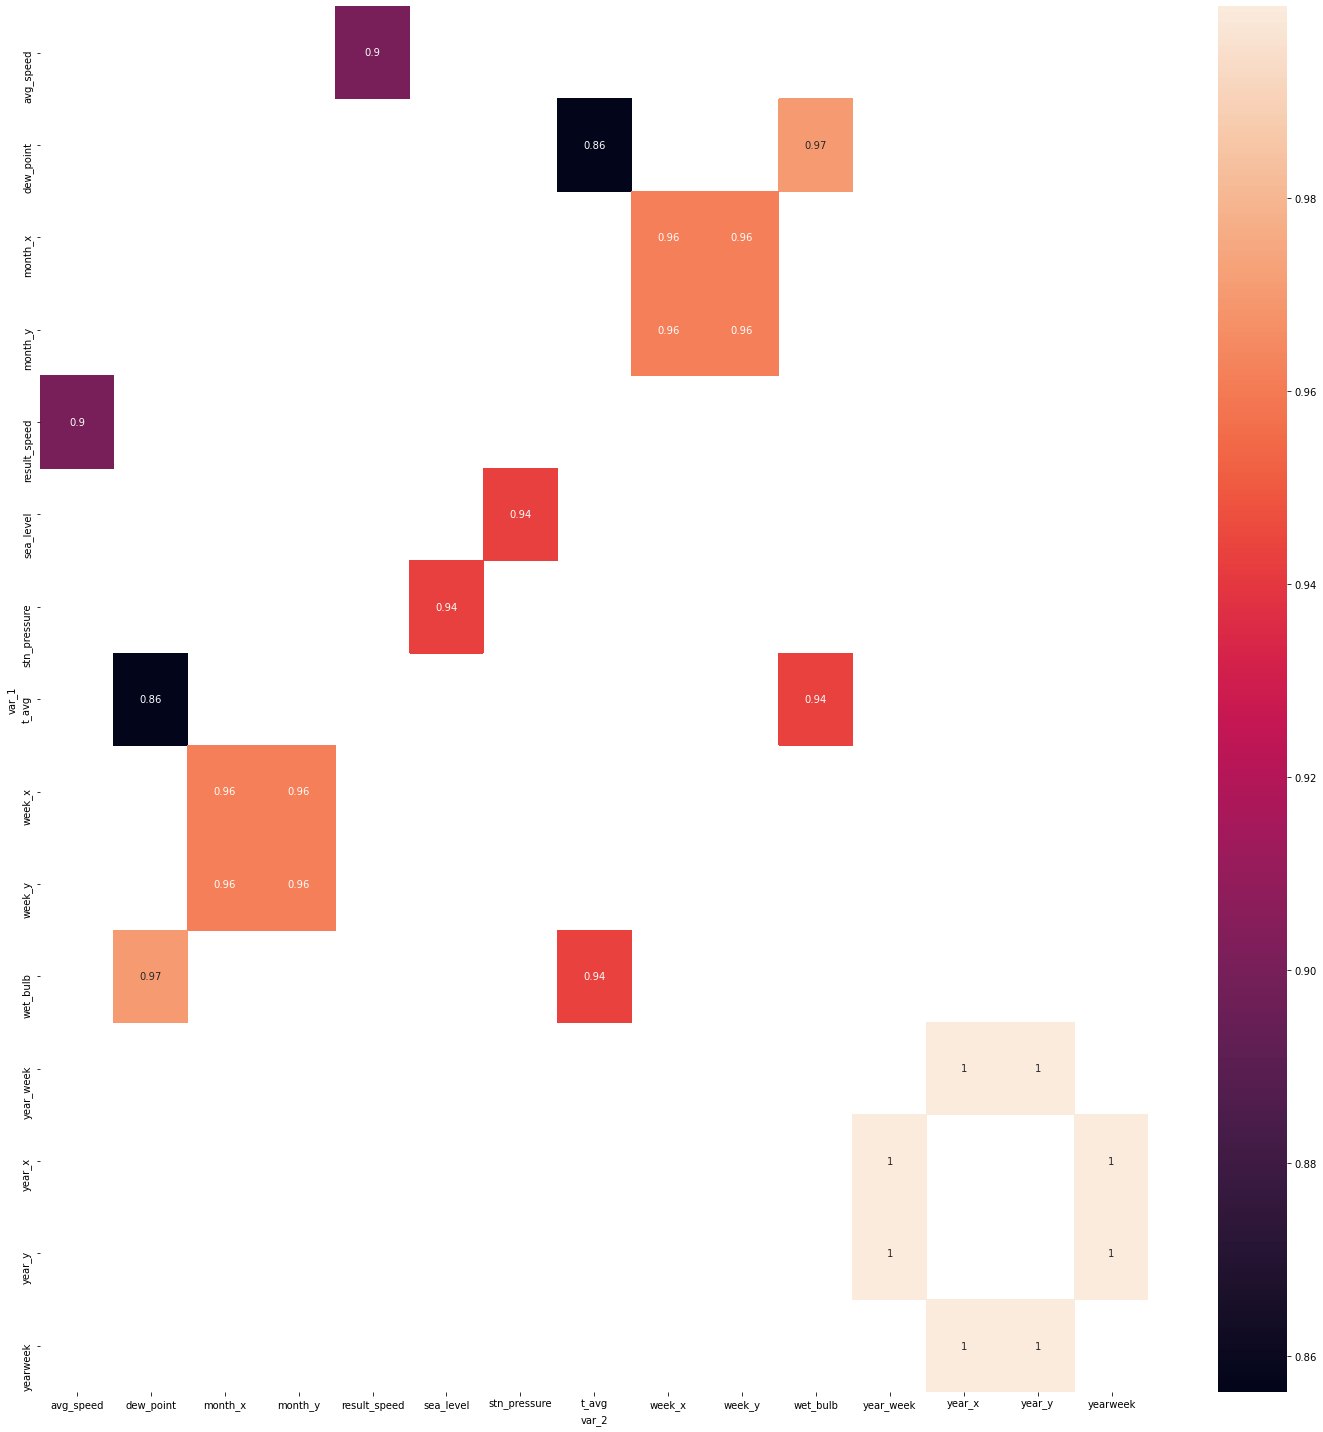

In [13]:
# plot correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot = True)
plt.tight_layout()

### Plot Correlation Heatmap

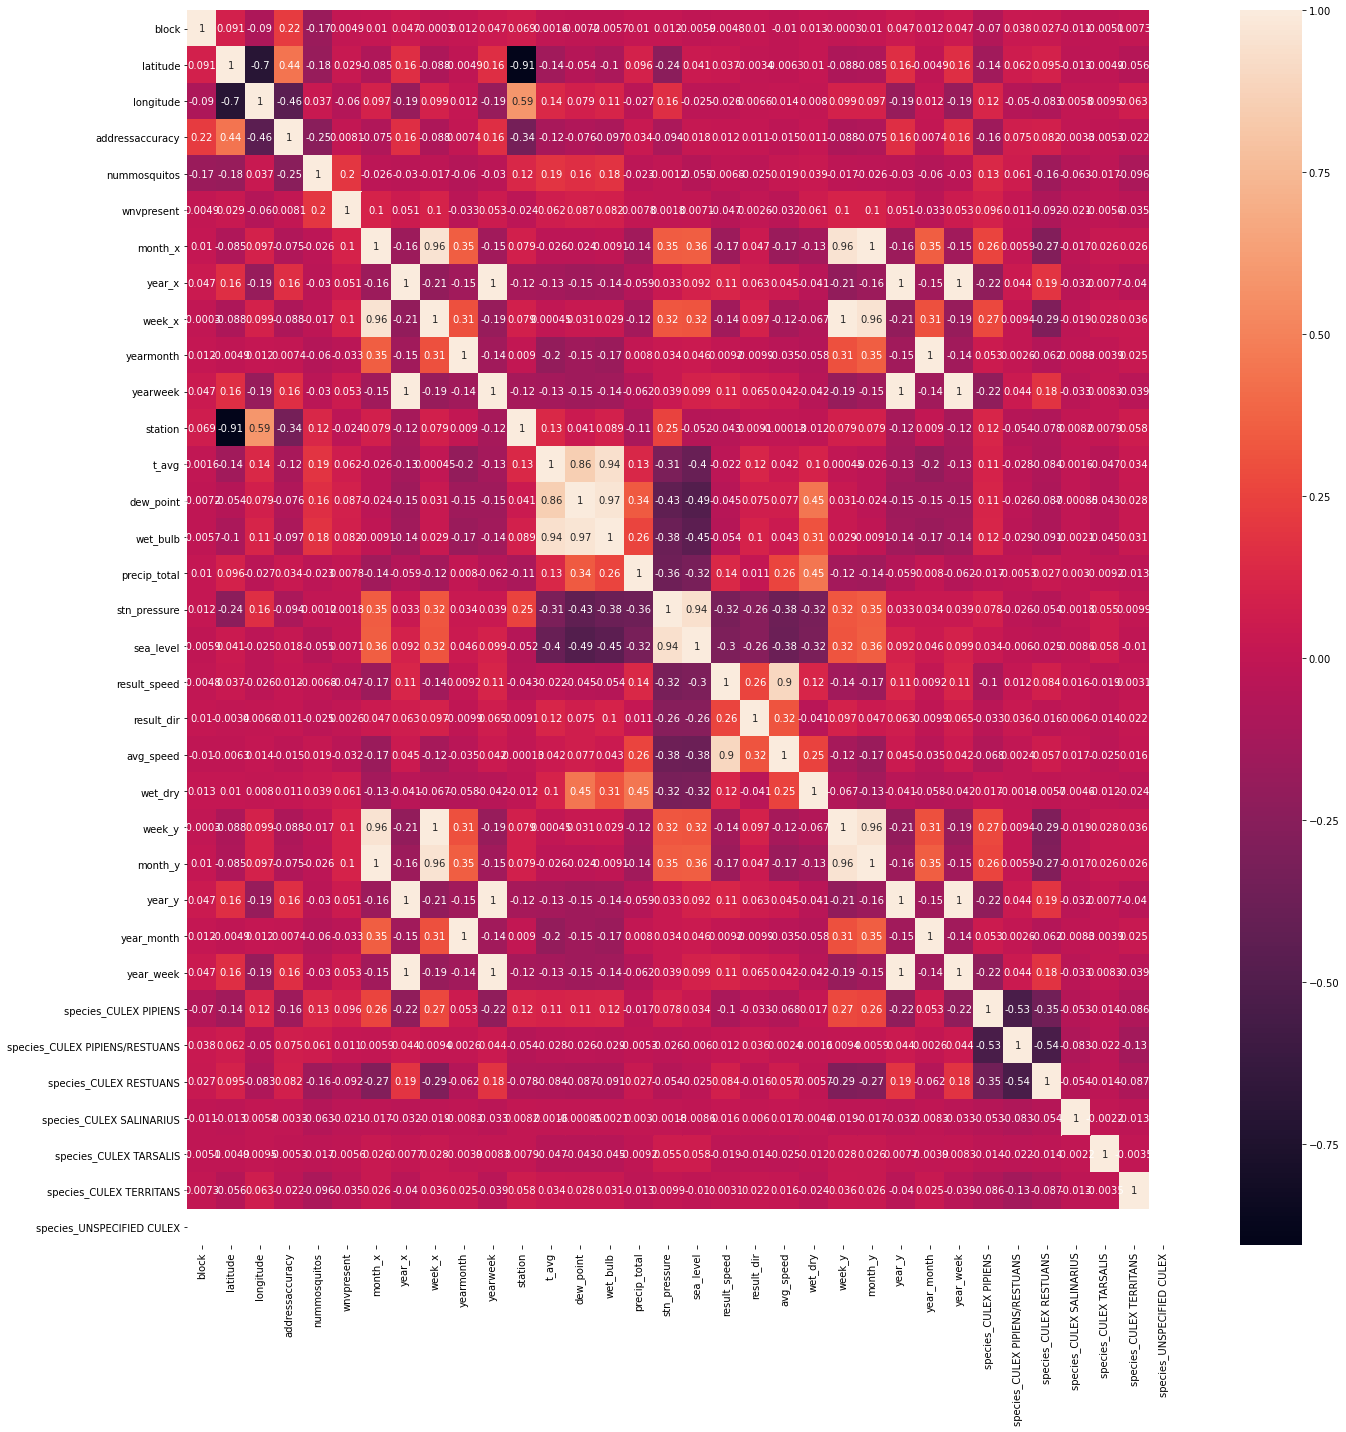

In [14]:
# plot correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(train_merged_df.corr(), annot = True)
plt.tight_layout()

In [15]:
#pulling the correlation of the columns with the saleprice and sorting it in ascending order
wnvpresent_corr = abs(train_merged_df.corr()[['wnvpresent']]).sort_values('wnvpresent', ascending=True)
#filter correlation dataframe, keep those with correlation lower than 0.05
wnvpresent_corr_below5per = wnvpresent_corr.loc[wnvpresent_corr['wnvpresent'] < 0.05]

<AxesSubplot:>

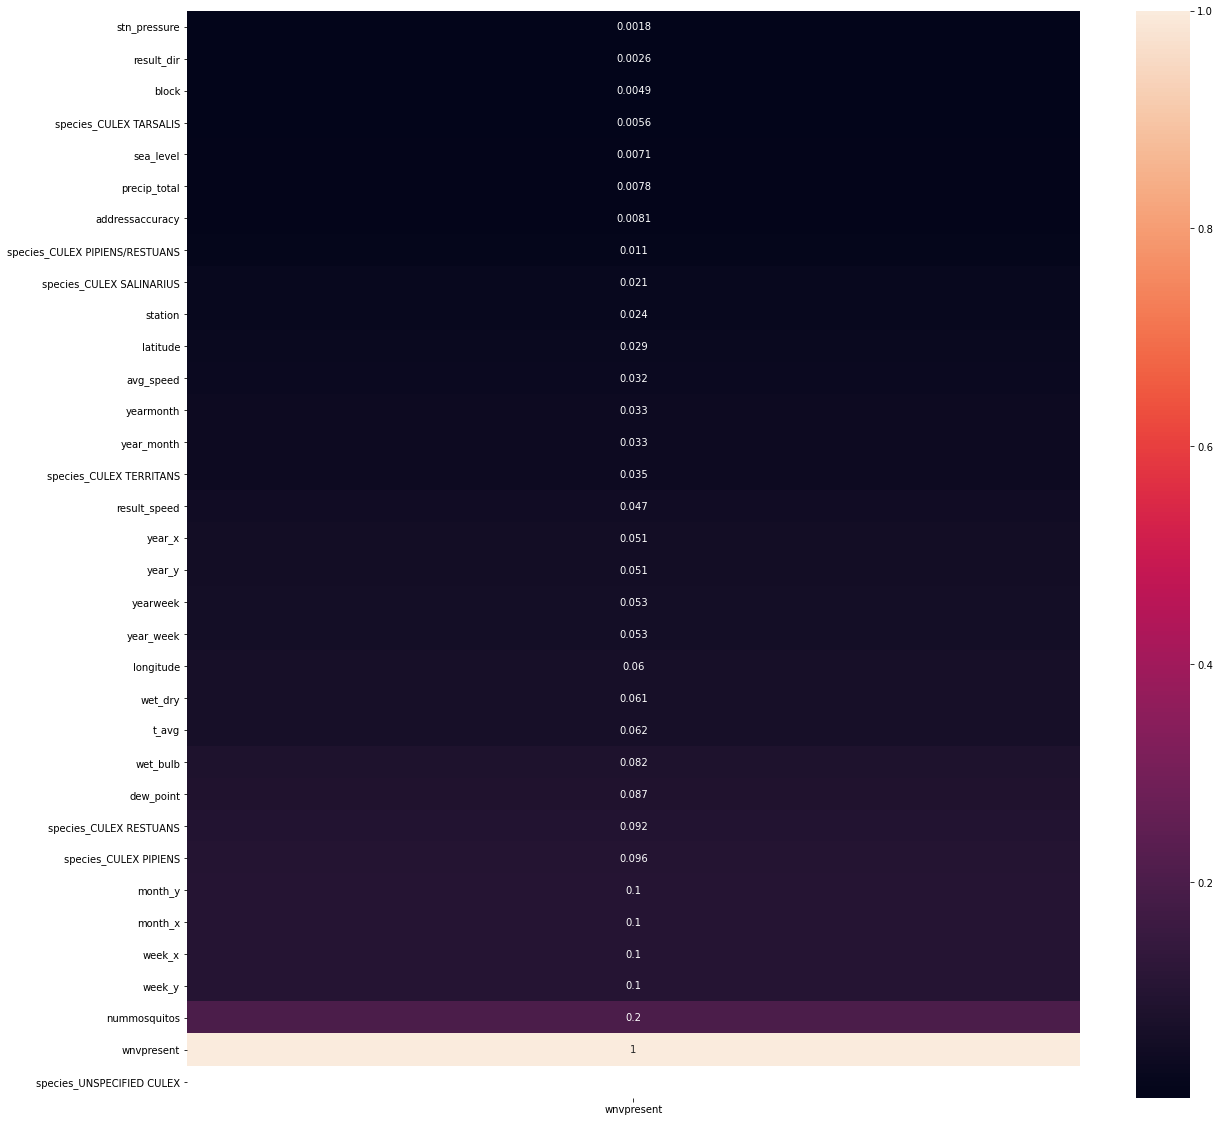

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(wnvpresent_corr, annot = True)

In [17]:
#pulling the correlation of the columns with the saleprice and sorting it in ascending order
mosquitos_corr = abs(train_merged_df.corr()[['nummosquitos']]).sort_values('nummosquitos', ascending=True)
#filter correlation dataframe, keep those with correlation lower than 0.05
mosquitos_corr_below5per = mosquitos_corr.loc[mosquitos_corr['nummosquitos'] < 0.05]

<AxesSubplot:>

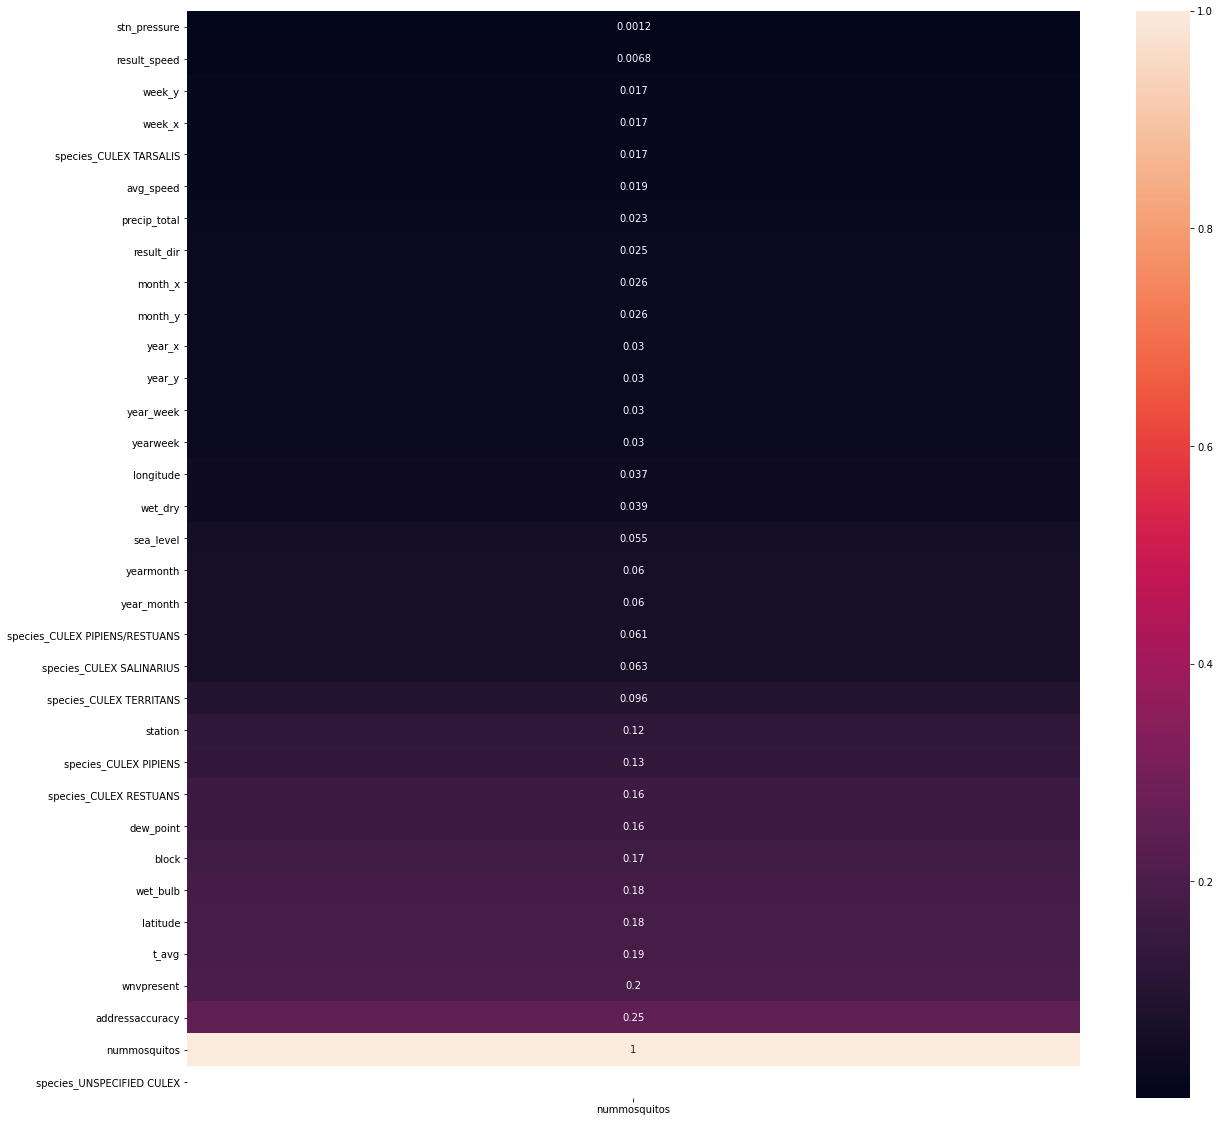

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(mosquitos_corr, annot = True)

In [19]:
train_merged_df.drop(columns=['result_speed','dew_point', 'wet_bulb','week_y','year_y','year_week','yearweek',
                              'year_month','month_y', 'stn_pressure', 'nummosquitos'], inplace=True)

In [20]:
train_merged_df.columns

Index(['date', 'address', 'block', 'street', 'trap', 'addressnumberandstreet',
       'latitude', 'longitude', 'addressaccuracy', 'wnvpresent', 'date_1',
       'month_x', 'year_x', 'geometry', 'week_x', 'yearmonth', 'station',
       't_avg', 'precip_total', 'sea_level', 'result_dir', 'avg_speed',
       'wet_dry', 'species_CULEX PIPIENS', 'species_CULEX PIPIENS/RESTUANS',
       'species_CULEX RESTUANS', 'species_CULEX SALINARIUS',
       'species_CULEX TARSALIS', 'species_CULEX TERRITANS',
       'species_UNSPECIFIED CULEX'],
      dtype='object')

<AxesSubplot:>

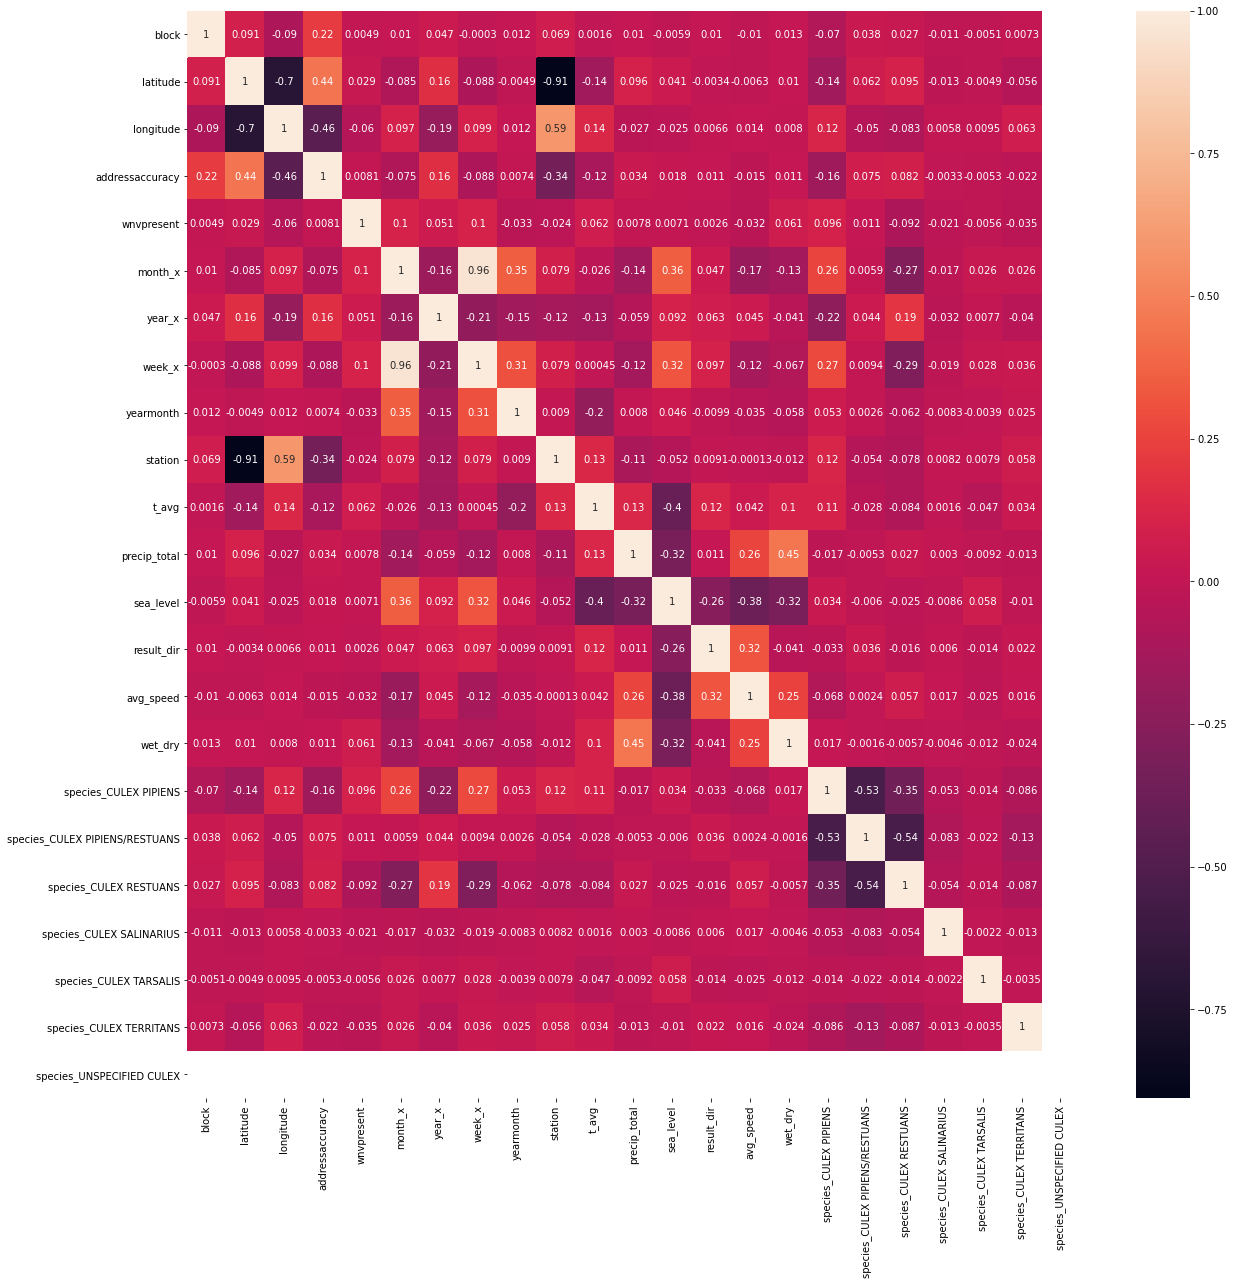

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(train_merged_df.corr(), annot = True)

## Save Dataset

In [22]:
train_merged_df.to_csv('../assets/train_merged_df.csv')

In [23]:
%store train_merged_df

Stored 'train_merged_df' (DataFrame)
